# Introduction to Sabermetrics

To begin, let's use the `Pandas` library to determine some basic descriptive information about some given seasons, and create columns to compute the **batting average** of players.  We will use data from the Lahman database.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('data/lahman/Batting.csv')

In [4]:
df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 22 columns):
playerID    104324 non-null object
yearID      104324 non-null int64
stint       104324 non-null int64
teamID      104324 non-null object
lgID        103586 non-null object
G           104324 non-null int64
AB          104324 non-null int64
R           104324 non-null int64
H           104324 non-null int64
2B          104324 non-null int64
3B          104324 non-null int64
HR          104324 non-null int64
RBI         103568 non-null float64
SB          101956 non-null float64
CS          80832 non-null float64
BB          104324 non-null int64
SO          97974 non-null float64
IBB         67722 non-null float64
HBP         101507 non-null float64
SH          98255 non-null float64
SF          68259 non-null float64
GIDP        78921 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.5+ MB


According to the documentation, these are the variable descriptions:

- `playerID`       Player ID code
- `yearID`         Year
- `stint`          player's stint (order of appearances within a season)
- `teamID`         Team
- `lgID`           League
- `G`              Games
- `AB`             At Bats
- `R`              Runs
- `H`              Hits
- `2B`             Doubles
- `3B`             Triples
- `HR `            Homeruns
- `RBI`            Runs Batted In
- `SB`             Stolen Bases
- `CS`             Caught Stealing
- `BB`             Base on Balls
- `SO`             Strikeouts
- `IBB`            Intentional walks
- `HBP`            Hit by pitch
- `SH`             Sacrifice hits
- `SF`             Sacrifice flies
- `GIDP`           Grounded into double plays


So, here are some questions:

1. Who has the most hits in a season?
2. Most homeruns?
3. What team had the most hits in 2011?
4. Does it seem to matter what league you're in as to the number of hits?

We will find that the hitting data doesn't contain very detailed information about the players, so we will use the additional player table to then find the players first and last name.

In [6]:
df.nlargest(1, 'H')

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
85828,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,60.0,36.0,11.0,49,63.0,19.0,4.0,2.0,3.0,6.0


In [7]:
player = pd.read_csv('data/lahman/People.csv')

In [8]:
player.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [9]:
df.nlargest(1, 'H').merge(player, on='playerID')[['yearID', 'nameGiven', 'H']]
#Showing the concept of merging (i.e., joinging)

,yearID,nameGiven,H
0,2004,Ichiro,262


In [10]:
df.nlargest(1, 'HR').merge(player, on='playerID')[['yearID', 'nameFirst', 'nameLast', 'HR']]
#Showing the concept of merging (i.e., joinging)--again

,yearID,nameFirst,nameLast,HR
0,2001,Barry,Bonds,73


           H
teamID      
BOS     1600
TEX     1599
KCA     1560
DET     1540
SLN     1513


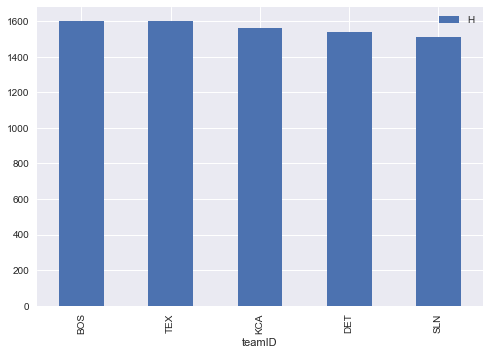

In [11]:
print(df[df['yearID'] == 2011].groupby('teamID')[['teamID', 'H']].sum().nlargest(5, 'H'))
df[df['yearID'] == 2011].groupby('teamID')[['teamID', 'H']].sum().nlargest(5, 'H').plot(kind = 'bar')

lgID
AA    Axes(0.125,0.125;0.775x0.755)
AL    Axes(0.125,0.125;0.775x0.755)
FL    Axes(0.125,0.125;0.775x0.755)
NL    Axes(0.125,0.125;0.775x0.755)
PL    Axes(0.125,0.125;0.775x0.755)
UA    Axes(0.125,0.125;0.775x0.755)
Name: HR, dtype: object

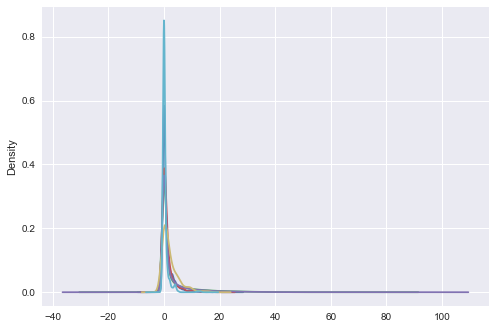

In [12]:
df.groupby('lgID')['HR'].plot(kind = 'density')

In [14]:
leagues = df[(df['lgID'] == 'NL' )| (df['lgID'] == 'AL')]

lgID
AL    Axes(0.125,0.125;0.775x0.755)
NL    Axes(0.125,0.125;0.775x0.755)
Name: HR, dtype: object

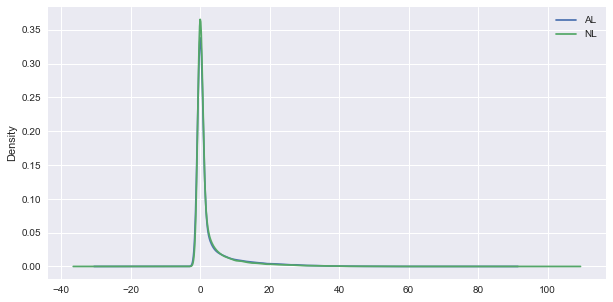

In [15]:
leagues.groupby('lgID')['HR'].plot(kind = 'density', figsize = (10, 5), legend = True)

In [16]:
df[df['lgID'] == 'AL']['HR'].sum()

146908

In [17]:
df[df['lgID'] == 'NL']['HR'].sum()

145386

### Batting Average

$$BA = \frac{\text{Hits}}{\text{At Bats}}$$

In [18]:
df['batting_average'] = df.H / df.AB

In [19]:
df.batting_average.mean()

0.20862018734214524

In 2016, did the Yankees have a better batting average than the rest of the league?

In [27]:
df.groupby(df.teamID)[['teamID', 'batting_average']].mean().nlargest(15, 'batting_average')

,batting_average
teamID,
BS1,0.306413
PH1,0.290351
TRO,0.284186
NYP,0.280707
RC1,0.264593
NY2,0.262561
ML3,0.259324
BLN,0.257830
MID,0.255648


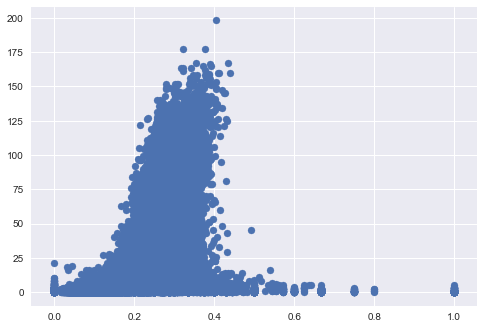

In [28]:
plt.scatter(df.batting_average, df.R)

In [29]:
teams = df.groupby('teamID')[['batting_average', 'R']].mean()

In [29]:
teams.head()

,batting_average,R
teamID,,
ALT,0.238714,5.000000
ANA,0.221224,18.709199
ARI,0.198155,15.910270
ATL,0.198994,16.662344
BAL,0.209805,17.086807


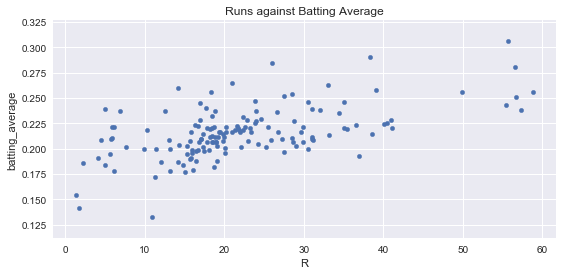

In [30]:
teams.plot.scatter('R', 'batting_average', figsize = (9, 4), title = 'Runs against Batting Average')

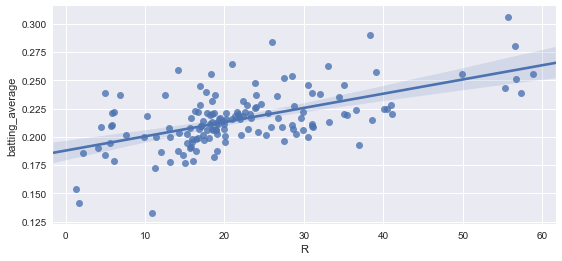

In [31]:
plt.figure(figsize = (9, 4))
sns.regplot('R', 'batting_average', data = teams)

In [33]:
def lin_reg_plot(df, x, y):
    lr = LinearRegression()
    lr.fit(df[x].values.reshape(-1,1), df[y])
    pred = lr.predict(df[x].values.reshape(-1,1))
    print('Score: ', lr.score(df[x].values.reshape(-1,1), df[y]))
    plt.figure(figsize = (9, 4))
    sns.regplot(x, y, data = df)
    
    # Fits a linear moddel, prints the score of the model, and displays a regplot
    #"Score" is "how much of the data is "

In [34]:
from sklearn.linear_model import LinearRegression

Score:  0.332677963041


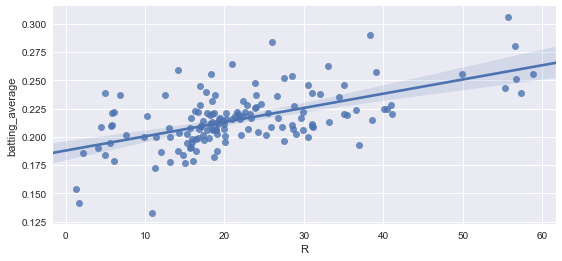

In [35]:
lin_reg_plot(teams, 'R', 'batting_average')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 23 columns):
playerID           104324 non-null object
yearID             104324 non-null int64
stint              104324 non-null int64
teamID             104324 non-null object
lgID               103586 non-null object
G                  104324 non-null int64
AB                 104324 non-null int64
R                  104324 non-null int64
H                  104324 non-null int64
2B                 104324 non-null int64
3B                 104324 non-null int64
HR                 104324 non-null int64
RBI                103568 non-null float64
SB                 101956 non-null float64
CS                 80832 non-null float64
BB                 104324 non-null int64
SO                 97974 non-null float64
IBB                67722 non-null float64
HBP                101507 non-null float64
SH                 98255 non-null float64
SF                 68259 non-null float64
GIDP          

In [37]:
run_counts = df[(df['yearID'] > 1954) & (df['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['R', 'batting_average']].agg({'R': 'sum', 'batting_average': 'mean'})
ba= df[(df['yearID'] > 1954) & (df['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['batting_average']].mean()

In [38]:
ba.shape

(1422, 1)

In [39]:
run_counts.shape

(1422, 2)

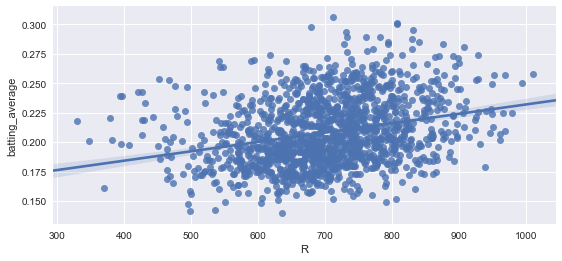

In [40]:
plt.figure(figsize = (9, 4))
sns.regplot( run_counts.R, run_counts.batting_average)


In [41]:
y = run_counts.batting_average
X = run_counts.R.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.07777602996325228

In [42]:
lr.coef_

array([  7.96023471e-05])

In [43]:
lr.intercept_

0.15241354901746035

In [44]:
X.shape

(1422, 1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 23 columns):
playerID           104324 non-null object
yearID             104324 non-null int64
stint              104324 non-null int64
teamID             104324 non-null object
lgID               103586 non-null object
G                  104324 non-null int64
AB                 104324 non-null int64
R                  104324 non-null int64
H                  104324 non-null int64
2B                 104324 non-null int64
3B                 104324 non-null int64
HR                 104324 non-null int64
RBI                103568 non-null float64
SB                 101956 non-null float64
CS                 80832 non-null float64
BB                 104324 non-null int64
SO                 97974 non-null float64
IBB                67722 non-null float64
HBP                101507 non-null float64
SH                 98255 non-null float64
SF                 68259 non-null float64
GIDP          

In [46]:
players = df[df.AB > 40]

In [47]:
run_counts = players[(players['yearID'] > 1954) & (players['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['R', 'batting_average']].agg({'R': 'sum', 'batting_average': 'mean'})
ba= players[(players['yearID'] > 1954) & (players['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['batting_average']].mean()

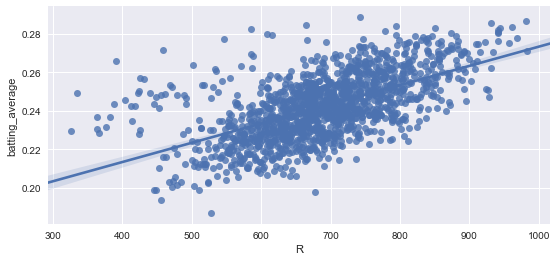

In [48]:
plt.figure(figsize = (9, 4))
sns.regplot( run_counts.R, run_counts.batting_average)

In [49]:
y = run_counts.batting_average
X = run_counts.R.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.3571644589654342

### PROBLEM

- Runs vs. Home Runs
- Runs vs. Home Runs Allowed
- Runs vs. Hits
- On Base Percentage vs. Runs

$$\text{On Base Percentage} = \frac{H + BB + HBP}{AB + BB + HBP + SF}$$

Note the numerator is referred to as **Total Bases**(TB)
- Slugging Percentage vs. Runs

$$\text{Slugging Percentage} = \frac{1B + 2B*2 + 3B*3 + HR*4}{AB}$$

- OPS

$$OBP = OBP + SLG$$

- Runs Created

$$\text{Runs Created} = \frac{(H + BB) * TB}{AB + BB}$$

In [108]:
df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'batting_average'],
      dtype='object')

In [114]:
df['OBP'] = (df.H + df.BB + df.HBP) / (df.AB + df.BB + df.HBP + df.SF)
df['1B'] = df['H'] - (df['2B'] + df['3B'] + df['HR'])
df['TB'] = df['1B'] + (df['2B'] * 2) + (df['3B'] * 3) + (df['HR']*4)
df['SLUG'] = df['TB']/df['AB']
df['OPS'] = df.SLUG + df.OBP
df['runs_created'] = ((df.H + df.BB) * df.TB) / (df.AB + df.BB)

In [121]:
df_noNA = df[df['yearID']>1954].dropna()
y = df_noNA.SLUG
X = df_noNA.R.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
lr.score(X,y)

0.2172823067308659

In [122]:
df_noNA = df[df['yearID']>1954].dropna()
y = df_noNA.OBP
X = df_noNA.R.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
lr.score(X,y)

0.1774351790282327

In [124]:
df_noNA = df[df['yearID']>1954].dropna()
y = df_noNA.SLUG
X = df_noNA.R.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
lr.score(X,y)

0.2172823067308659

In [125]:
teams = df_noNA.groupby(df.teamID)

In [132]:
X = teams.R.sum().values.reshape(-1,1)
y = teams.runs_created.sum()
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
lr.score(X,y)

0.9993047848442781